In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [3]:
df_train.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [4]:
df_train.acousticness.value_counts()

0.268625    2
0.023058    2
0.012316    2
0.129865    2
0.001415    1
           ..
0.014405    1
0.023589    1
0.649502    1
0.475992    1
0.898320    1
Name: acousticness, Length: 36004, dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   song_duration_ms  9043 non-null   float64
 2   acousticness      9050 non-null   float64
 3   danceability      9024 non-null   float64
 4   energy            8945 non-null   float64
 5   instrumentalness  9000 non-null   float64
 6   key               9008 non-null   float64
 7   liveness          8994 non-null   float64
 8   loudness          8974 non-null   float64
 9   audio_mode        10000 non-null  int64  
 10  speechiness       10000 non-null  float64
 11  tempo             10000 non-null  float64
 12  time_signature    10000 non-null  int64  
 13  audio_valence     10000 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 1.1 MB


In [7]:
train_col_null_counts = []
for col_name in df_train.columns.values:
    train_col_null_counts.append(df_train[col_name].isnull().sum())
print(train_col_null_counts)    

[0, 4101, 3992, 4026, 3975, 3985, 4065, 4086, 3957, 0, 0, 0, 0, 0, 0]


In [8]:
test_col_null_counts = []
for col_name in df_test.columns.values:
    test_col_null_counts.append(df_test[col_name].isnull().sum())
print(test_col_null_counts)  

[0, 957, 950, 976, 1055, 1000, 992, 1006, 1026, 0, 0, 0, 0, 0]


In [9]:
def plot_col_nulls(col_null_counts, col_names, ylabel, title):    
    fig, ax = plt.subplots(figsize=(14, 6))
    sns.set_theme(style="whitegrid")
    bars = ax.bar(col_names, col_null_counts)
    ax.set_title(title)
    ax.set_xlabel("column names")
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=90)
    # add the y value on top of each bar
    for bar in bars:
        y_val = bar.get_height()
        plt.text(bar.get_x(), y_val+0.05, y_val)    
    ax = sns.barplot(y=col_null_counts, x=col_names, ax=ax)    

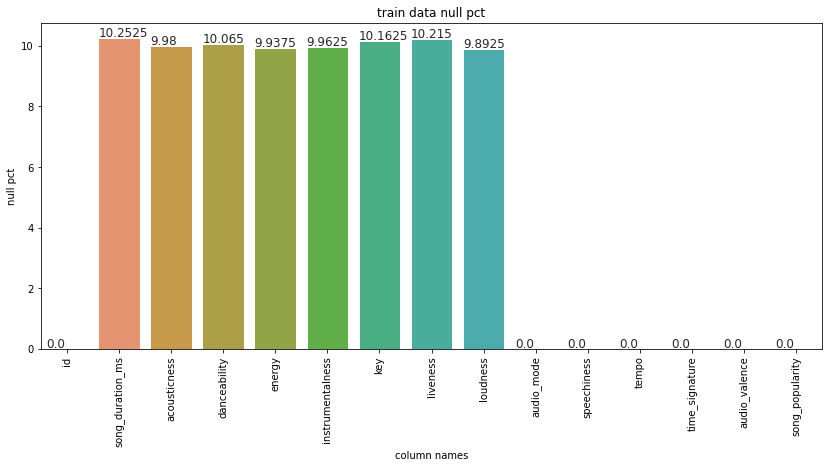

In [10]:
train_col_null_ratio = [round((item/len(df_train))*100, 4) for item in train_col_null_counts]
plot_col_nulls(train_col_null_ratio, df_train.columns.values.tolist(), "null pct", "train data null pct")

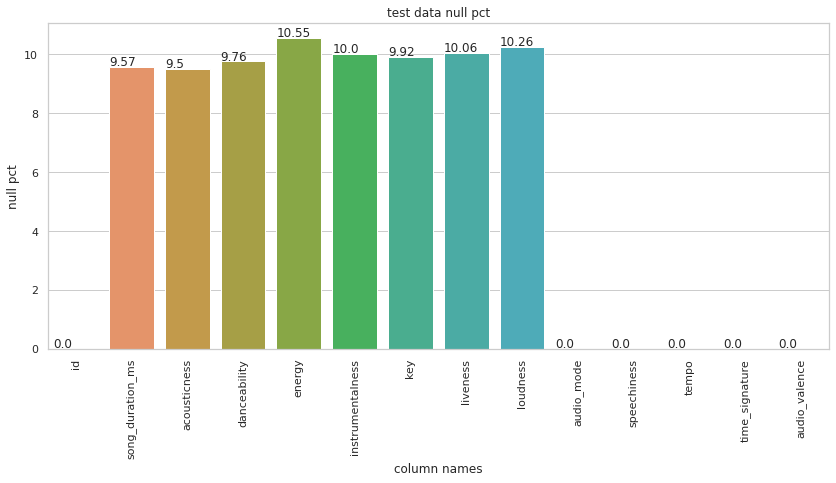

In [11]:
test_col_null_ratio = [round((item/len(df_test))*100, 4) for item in test_col_null_counts]
plot_col_nulls(test_col_null_ratio, df_test.columns.values.tolist(), "null pct", "test data null pct")

### Feature correlation

In [13]:
df_train = df_train.drop(labels=["id"], axis=1)
df_train.corr()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
song_duration_ms,1.000000,-0.166443,-0.061929,0.148531,-0.024337,0.019354,0.033009,0.152954,-0.017211,-0.001236,0.085490,0.021609,-0.006948,-0.003960
acousticness,-0.166443,1.000000,-0.093737,-0.570177,0.072516,-0.186663,-0.124704,-0.532724,0.066973,-0.130244,-0.190964,-0.205307,-0.250310,0.025298
danceability,-0.061929,-0.093737,1.000000,0.099933,-0.146447,0.120514,0.045400,0.200148,0.030289,0.177937,-0.089887,0.016455,0.384496,0.017572
energy,0.148531,-0.570177,0.099933,1.000000,-0.120338,0.210176,0.154907,0.643931,-0.094916,0.120053,0.225465,0.238722,0.324626,-0.054640
instrumentalness,-0.024337,0.072516,-0.146447,-0.120338,1.000000,-0.054726,-0.033445,-0.181889,-0.003617,-0.053209,-0.010350,-0.047397,-0.157760,-0.009511
key,0.019354,-0.186663,0.120514,0.210176,-0.054726,1.000000,0.077046,0.201509,-0.036252,0.102993,0.053206,0.094144,0.132194,0.017808
liveness,0.033009,-0.124704,0.045400,0.154907,-0.033445,0.077046,1.000000,0.146551,-0.013281,0.076612,0.064425,0.037766,0.084770,0.016571
loudness,0.152954,-0.532724,0.200148,0.643931,-0.181889,0.201509,0.146551,1.000000,-0.076893,0.157550,0.173979,0.245403,0.356330,-0.040662
audio_mode,-0.017211,0.066973,0.030289,-0.094916,-0.003617,-0.036252,-0.013281,-0.076893,1.000000,0.019790,-0.023202,-0.043714,-0.015683,-0.001455
speechiness,-0.001236,-0.130244,0.177937,0.120053,-0.053209,0.102993,0.076612,0.157550,0.019790,1.000000,0.036192,0.035013,0.112558,0.024230


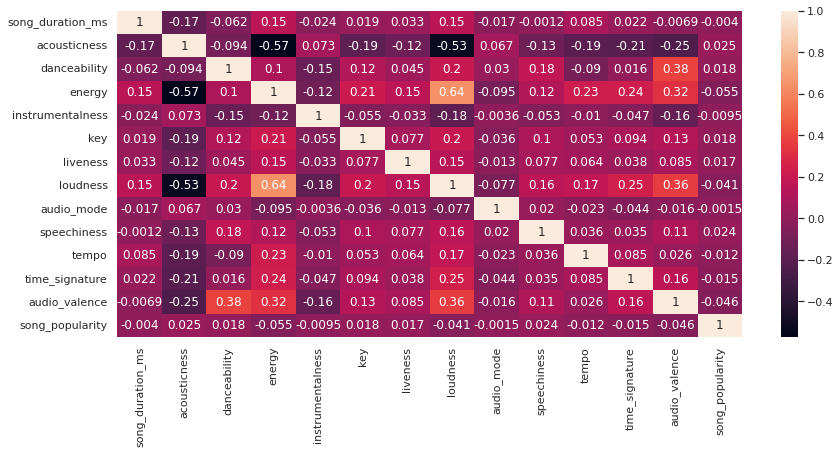

In [38]:
fig, ax = plt.subplots(figsize=(14, 6))
corr = df_train.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, ax = ax)

### Feature target interaction

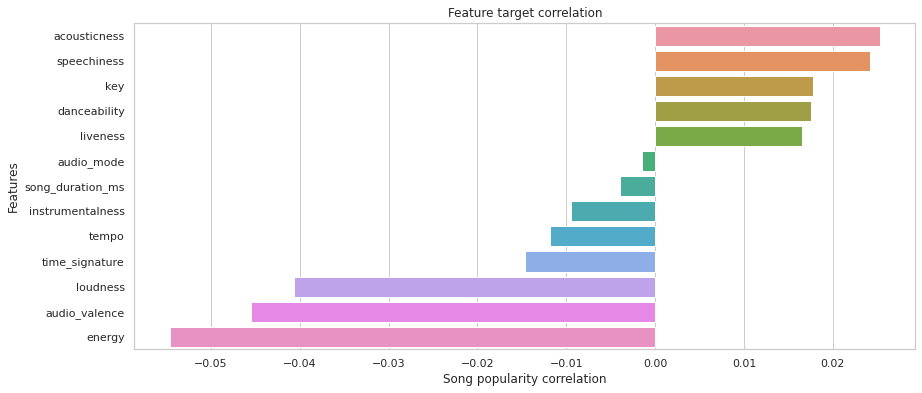

In [37]:
fig, ax = plt.subplots(figsize=(14, 6))
target_feature_interaction = corr["song_popularity"].sort_values(ascending=False)
labels = target_feature_interaction.index.to_list()
labels.remove('song_popularity')
values = target_feature_interaction.values.tolist()
values.pop(0)
ax.set_title("Feature target correlation")
ax.set_xlabel("Song popularity correlation")
ax.set_ylabel("Features")
ax = sns.barplot(x=values, y=labels, ax=ax)

### Continuous features distribution on train and test set

In [26]:
import math

categorical_cols = ["audio_mode", "time_signature", "key"]
cont_col_names = [item for item in df_test.columns.values.tolist() if item not in categorical_cols]
cont_col_names.remove("id")
n_rows = math.ceil(len(cont_col_names) / 2)
n_cols = 2

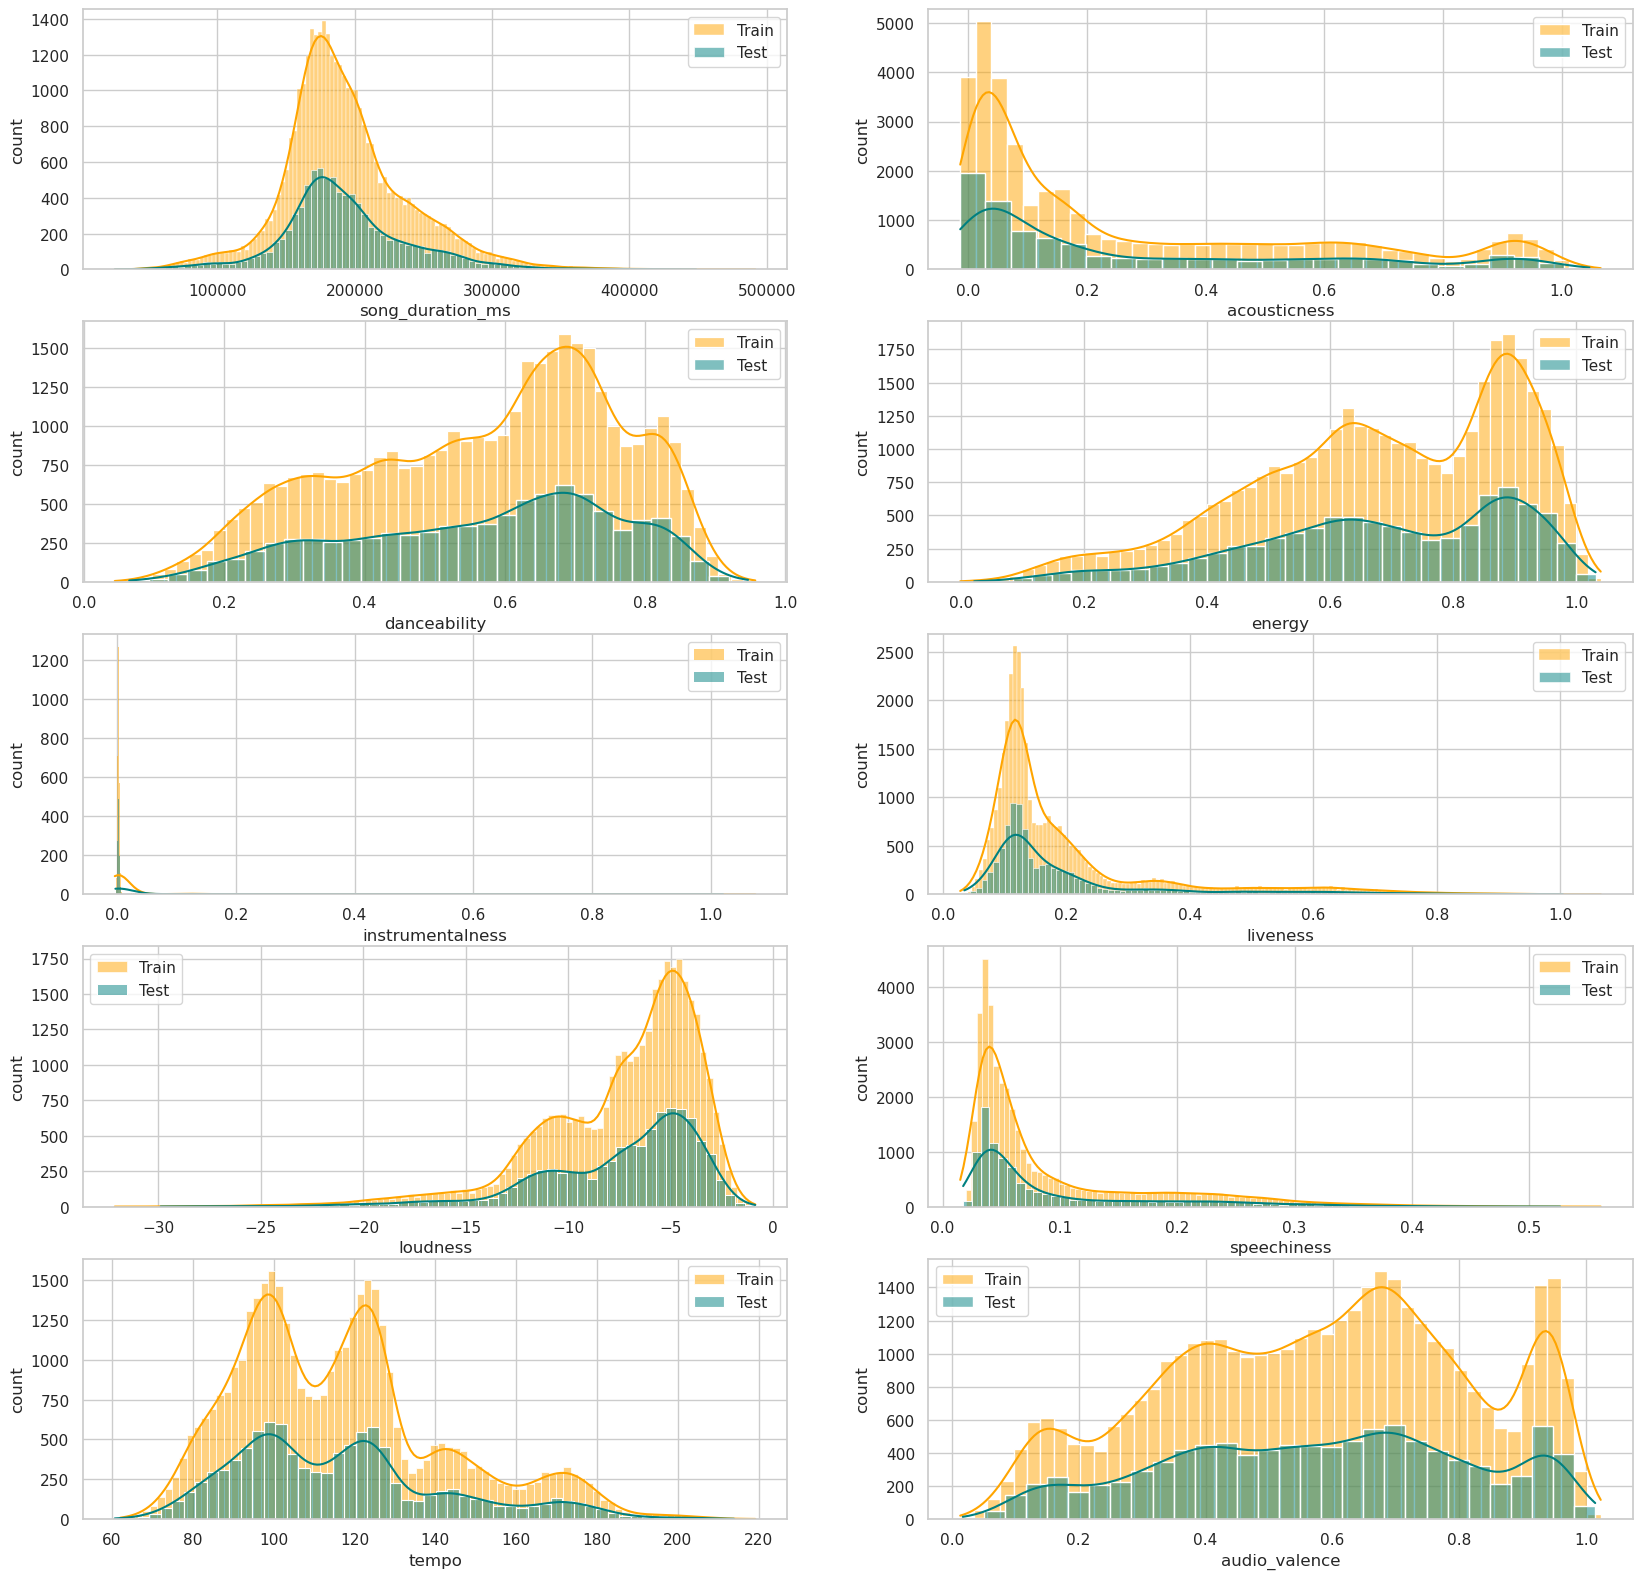

In [31]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,20), dpi=100)
for row in range(n_rows):
    for col in range(n_cols):
        index = (row * n_cols) + col
        col_name = cont_col_names[index]
        sns.histplot(x=df_train[col_name], label="Train", kde=True, fill=True, color="orange", ax=axes[row, col])
        sns.histplot(x=df_test[col_name], label="Test", kde=True, fill=True, color="teal", ax=axes[row, col])
        axes[row, col].legend()
        axes[row, col].set_ylabel("count")
        axes[row, col].set_xlabel(col_name)
plt.show()        

### Continuous features distribution based on target value

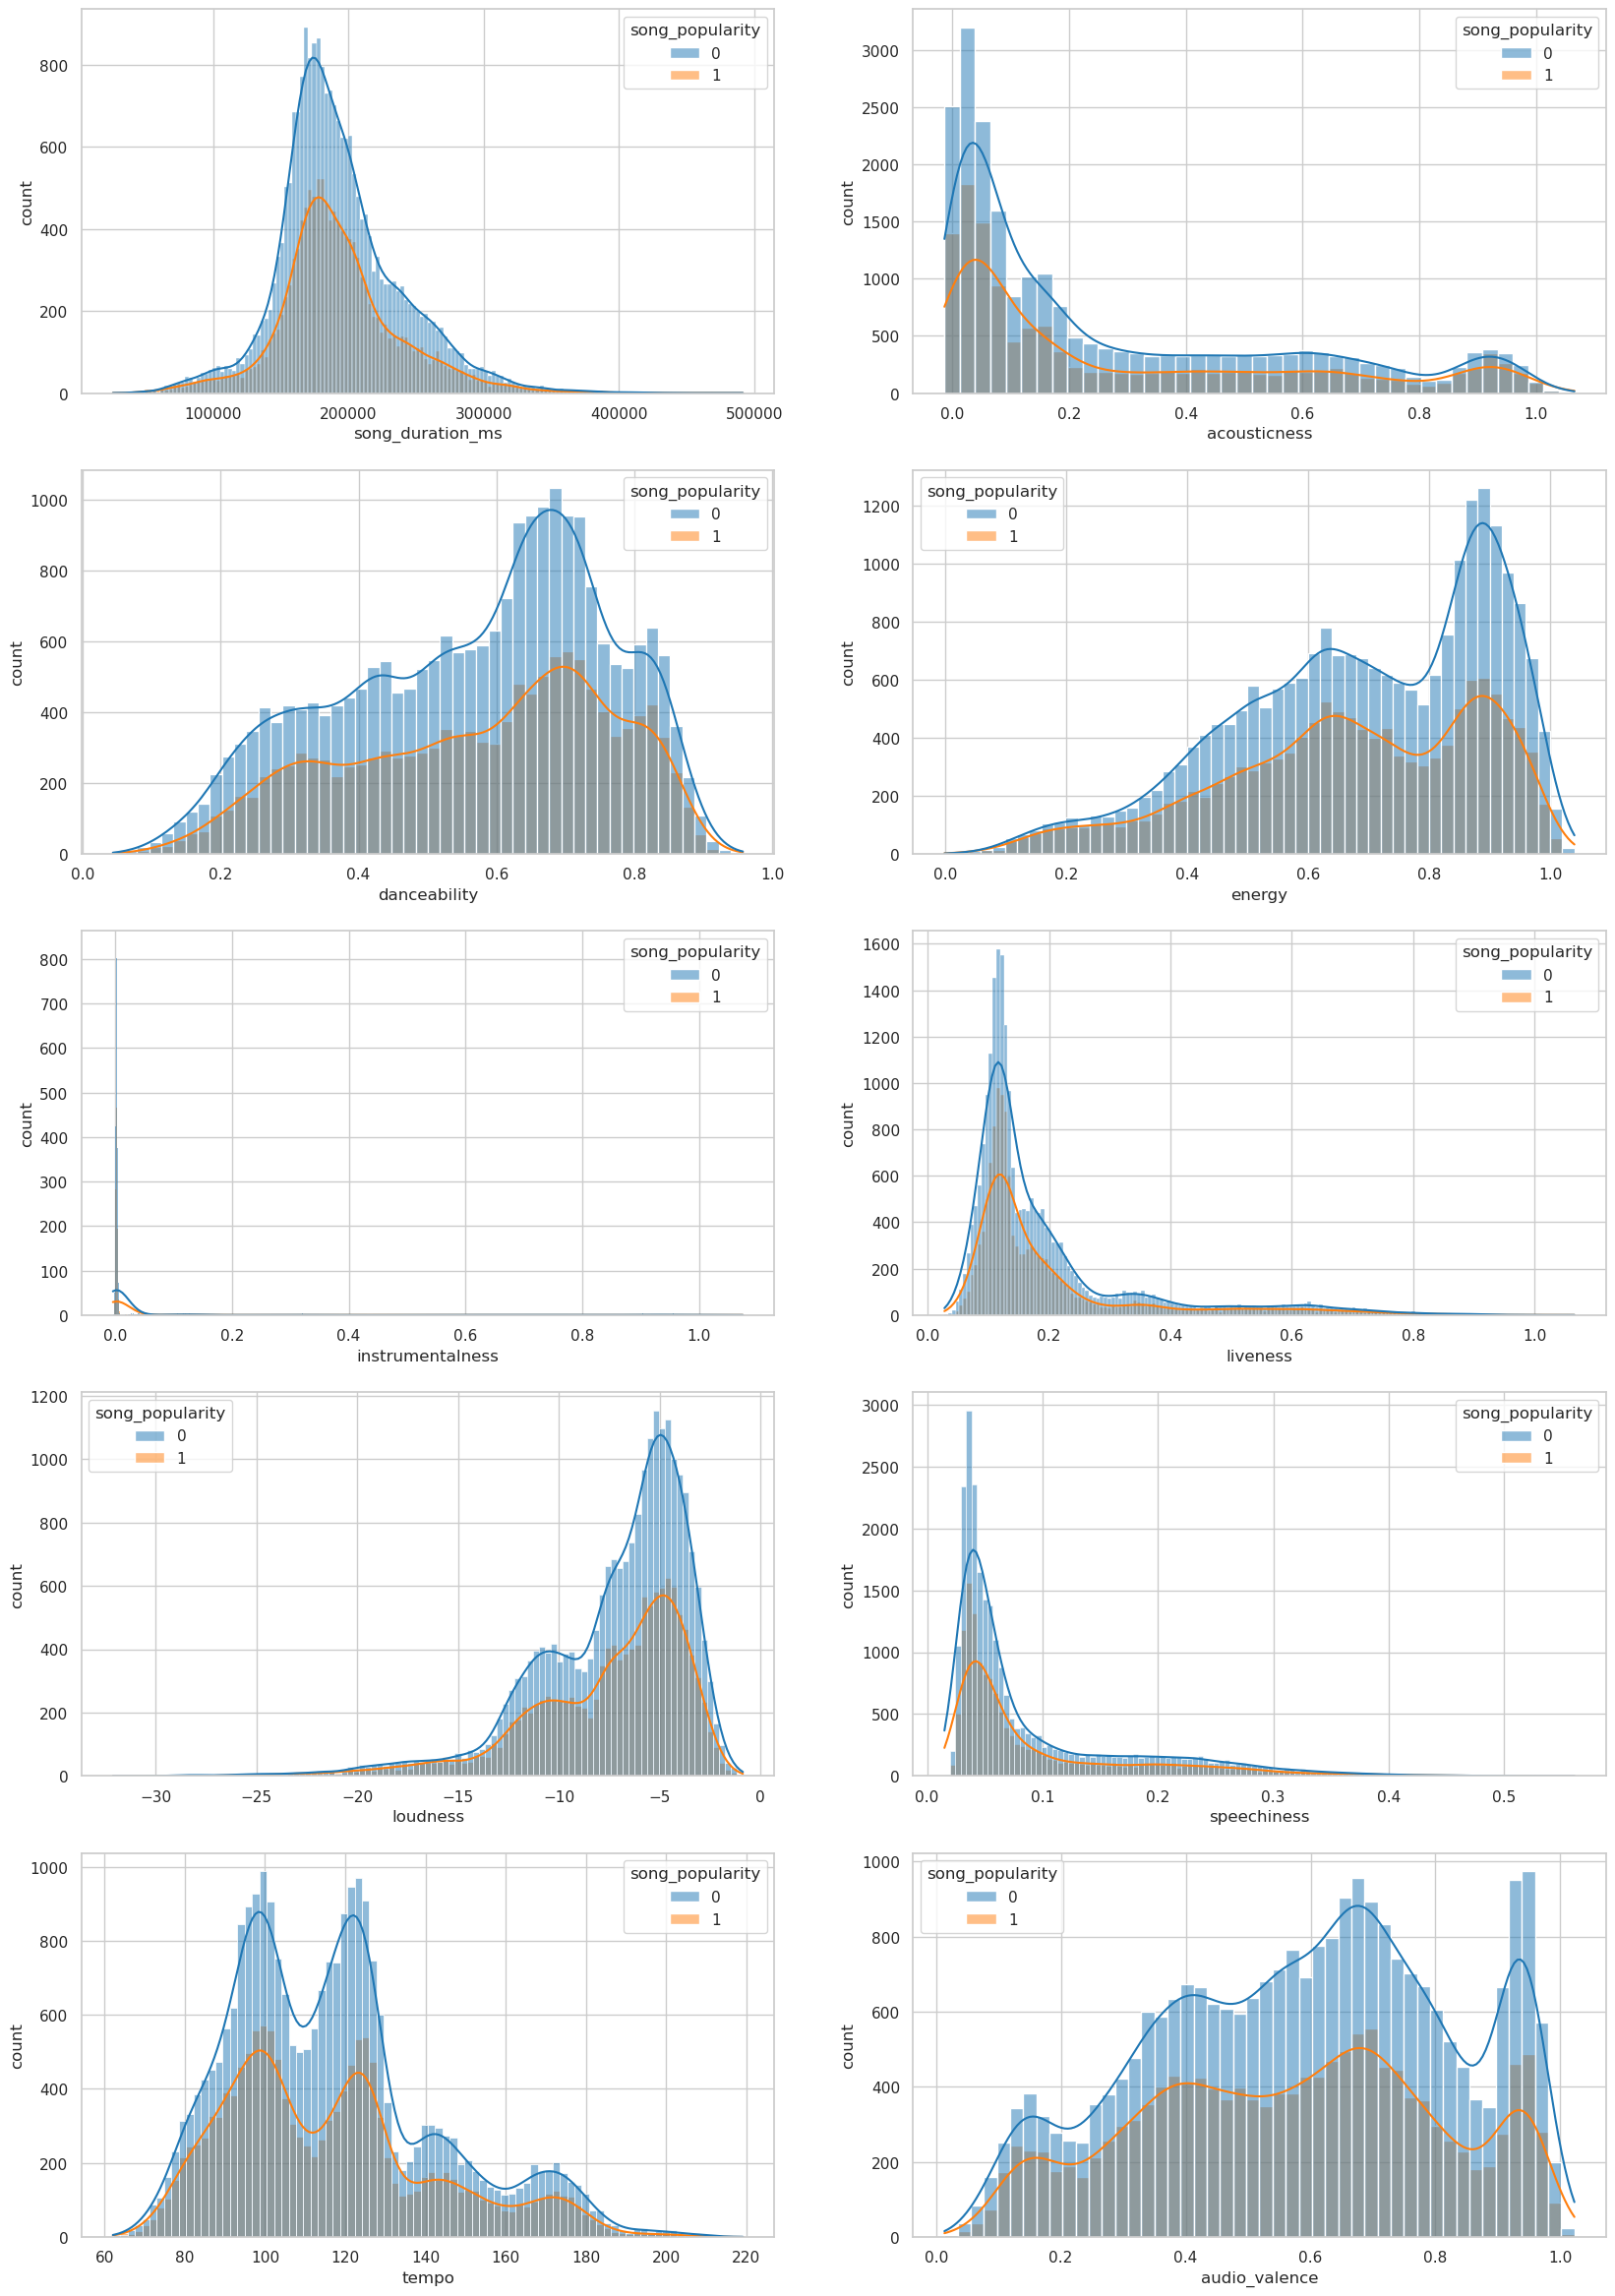

In [42]:
# positive samples
# df_train_pos = df_train[df_train.song_popularity == 1]
# negative samples
# df_train_neg = df_train[df_train.song_popularity == 0]
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,30), dpi=100)
for row in range(n_rows):
    for col in range(n_cols):
        index = (row * n_cols) + col
        col_name = cont_col_names[index]
        sns.histplot(data=df_train, x=col_name, hue="song_popularity", kde=True, palette="tab10", ax=axes[row, col])
        #sns.histplot(x=df_train_pos[col_name], label="Positive", kde=True, fill=True, color="red", ax=axes[row, col])
        #sns.histplot(x=df_train_neg[col_name], label="Negative", kde=True, fill=True, color="deepskyblue", ax=axes[row, col])
        #axes[row, col].legend()
        axes[row, col].set_ylabel("count")
        axes[row, col].set_xlabel(col_name)
plt.show()  